# <center> **Insights from the Online Retail Shipping Dataset: <br>Underlying Problems and How to Solve Them**</center>

In this notebook, we aimed to explore data analysis techniques through a project for Purwadhika's DTI Data Science program (Capstone 2).  <br>we was tasked with analyzing potential business problems that a company might encounter using the Online Retail Shipping Dataset.  <br>Focusing on the data analysis aspect, we approached this project as a learning data analyst.

<div style="text-align: right;">
    Developed by: Muhamad Farikhin (2024)
</div>

***

**What are the contents of this notebook?**
<br>
1. Background
2. Problem Statement
3. Data
<br>
3.1. Setup Data
<br>
3.2. Data Exploration
<br>
3.3. Data Cleaning
<br>
3.4. Data Review
4. Data Analysis
<br>
4.1. Numerical Attributes Analysis
<br>
4.2. Categorical Attributes Analysis
<br>
4.3. Key Metric: Customer Ratings and Discount Percentage Analysis
<br>
4.4. Key Metric: Delivery Timeliness and Warehouse Block Analysis 
<br>
5. Final Thoughts
<br>
5.1. Conclusion
<br>
5.2. Recommendation
6. Cost Efficiency Proposition**
6.1. Minimizing Shipping Expenses

***
## **1. Background**


Since the dataset and its accompanying data dictionary lack specific context, We are drawing assumptions from the average product cost, approximately USD 210. <br>Based on this, we define this as a **furnishing company**. This assumption helps us better understand and interpret the data. It's plausible that this company is positioning <br>itself as a competitor to IKEA, aiming to capture market share, particularly in Indonesia.

To further enhance our understanding of the data and explore potential business propositions, <br>we've gathered additional information benchmarked against some of Indonesia's most commonly used products/services:

**Shipping Costs**:
1. Flight: IDR 36,190, provided by Lion Parcel (price option: Boss Pack), with an estimated delivery time of 1-2 days.
2. Road: IDR 31,000, provided by JNT (package: EZ), with an estimated delivery time of 3-7 days.
3. Ship: IDR 4,500, provided by PELNI, with an estimated delivery time of 8-10 days.

**Currency Conversion**:
We'll convert the product cost to Indonesian Rupiah (IDR) to align with our case, using the exchange rate of 1 USD = 16,305 IDR.

***
## **2. Problem Statement**

Based on the data, which we will delve into later, approximately 40% of the shipments experience delayed delivery. <br>This is concerning given the competitive landscape. If the company remains inattentive to their performance, they will be overtaken by their competitors. <br>To address this, the company must detect problems and implement effective strategies to maintain their position in the Indonesian furnishing industry.

**The analysis of the Online Retail Shipping Dataset aims to address the following key questions:**
1. What factors influence customer satisfaction, and how can strategies be implemented to enhance it?
2. What are the primary causes of shipment delays, and what actions can be taken to improve delivery timeliness?
3. How can operational costs in shipment be minimized?

**From the questions stated above, this report presents three main arguments:**
<br>
1. Understanding the factors that determine customer satisfaction also leads to increased profitability.
2. Identifying the reasons for delays and proposing improvements for faster delivery.
3. Reviewing shipment expenses to identify opportunities for reducing operational costs and enhancing efficiency.

***
## **3. Data**

The dataset provides comprehensive details on customer transactions for a furniture retailer operating in Indonesia. Key features of the dataset include:


| **Field**              | **Description**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| ID                     | ID number of customers.                                                         |
| Warehouse block        | The company has a big warehouse that is divided into blocks (A-E).              |
| Mode of shipment       | The company ships the products in multiple ways (Ship, Flight, and Road).       |
| Customer care calls    | The number of calls made from inquiries for inquiries of the shipment.          |
| Customer rating        | Rate from each customer. 1 is the lowest, and 5 is the highest.                 |
| Cost of the product    | Cost of the product in US Dollars.                                              |
| Prior purchases        | The number of previous purchases.                                               |
| Product importance     | The company has categorized the product in various parameters (low, medium, high). |
| Gender                 | Male and female.                                                                |
| Discount offered       | Discount offered on that specific product.                                      |
| Weight in gms          | The weight in grams.                                                            |
| Reached on time        | 1 indicates that the product has not arrived on time, and 0 indicates the product has arrived on time. |

### **3.1. Setup Data**

Prior to executing any data manipulations, it's crucial to initially import the required libraries and load the dataset.


#### **3.1.1 Importing Libraries**

In [406]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### **3.1.2 Importing Dataset**

In [407]:
df = pd.read_csv('data/Online Retail Shipping.csv')
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


### **3.2. Data Exploration**

After importing the required libraries and dataset, the next step is to explore and understand what the dataset contains.

#### **3.2.1. Dataset Check**


In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


The **datatype** of the columns are: integer, object, and float.

From df.info, we can conclude that the initial database have **10999 rows and 12 columns**.

This can be validated by checking the shape of the dataset.

In [409]:
print('Amount of Rows and Column:',df.shape)

Amount of Rows and Column: (10999, 12)


#### **3.2.2. Unique Value**

After gaining an understanding of the dataset's contents, the next step is to identify and analyze the unique values within it.

In [410]:
# set maximum column width to display & create empty list
pd.set_option('display.max_colwidth',1000)
itemList = []

# creates a list containing column name, number of unique values, and the unique values
for col in df.columns :
    itemList.append( [col, df[col].nunique(), df[col].unique()])

# construct new DataFrame to be displayed
uniqueTable = pd.DataFrame(
    columns=['Column Name', 'Number of Unique Values', 'Sample of Unique Values'],
    data=itemList)
uniqueTable

,Column Name,Number of Unique Values,Sample of Unique Values
0,ID,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Warehouse_block,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,3,"[Flight, Ship, Road]"
3,Customer_care_calls,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198, 275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234, 266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169, 160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261, 202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185, 278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168, 265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237, 264, 248, 191, 146, 135, 98, 97, 114, 112, ...]"
6,Prior_purchases,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,3,"[low, medium, high]"
8,Gender,2,"[F, M]"
9,Discount_offered,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43, 45, 6, 36, 18, 38, 51, 2, 28, 24, 31, 61, 22, 4, 62, 16, 56, 15, 9, 40, 37, 41, 17, 64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57, 7, 35, 8, 5, 53, 55, 47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30]"


#### **3.2.3. Data Description**

After understanding the contents of the dataset, the next step is to examine its descriptive statistics.

In [411]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


Below, you can find further information about the non-numerical columns.

In [412]:
df.describe(include='object').T

,count,unique,top,freq
Warehouse_block,10999,5,F,3666
Mode_of_Shipment,10999,3,Ship,7462
Product_importance,10999,3,low,5297
Gender,10999,2,F,5545


### **3.3. Data Cleaning**

#### **3.3.1. Handling Missing Values**

Each column **has no null values**, as evidenced by the non-null count matching the number of rows (as shown by *df.info()*). <br>Therefore, there is no need to fill in any missing values. This can be additionally verified by using the *isna().sum()* method to count the number of NaN values within the data.

In [413]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

#### **3.3.2. Duplicates**

It's crucial to check for duplicates as they can significantly impact the outcome of the analysis.

In [414]:
df.duplicated().any()

False

As seen from checking the duplicates, there are **no duplicates**. Thus, there are no records that needs to be dropped.

#### **3.3.3. Standardizing Data Format**

Next, we'll proceed with standardizing the data to improve dataset usability and analysis as follows:

1. Columns will be renamed to enhance clarity.
2. Based on the range of discount offered (1-60), it is assumed to be a percentage and will be renamed accordingly.
3. Translate 0 and 1 in "Reached on Time" to "No" and "Yes" respectively.
4. Rename Warehouse F to E to match the data dictionary, where warehouse blocks range from A to E.

In [415]:
# 1. Renaming columns
df.rename(
    columns={
        'Warehouse_block': 'warehouse_block',
        'Mode_of_Shipment': 'mode_of_shipment',
        'Customer_care_calls': 'customer_care_calls',
        'Customer_rating': 'customer_rating',
        'Cost_of_the_Product': 'cost_of_product',
        'Prior_purchases': 'prior_purchases',
        'Product_importance': 'product_importance',
        'Gender': 'gender', 
        'Weight_in_gms': 'weight_in_grams',
        'Reached.on.Time_Y.N': 'reached_on_time'
    }, inplace=True
)
# 2. Discount Percentage
df.rename(columns={'Discount_offered': 'discount_percentage'}, inplace=True)

# 3. Set labels for Reach On Time to "Yes/No"
df['reached_on_time'] = df['reached_on_time'].replace({1: 'Yes', 0: 'No'})

# 4. Renaming Warehouse Block F to E to match data dictionary
df['warehouse_block'] = df['warehouse_block'].replace('F', 'E')


#### **3.3.4. Transformation and Enrichment**

Next, we'll enhance the dataset's usability and improve our ability to derive meaningful insights by performing the following transformations:

1. **Converting the cost of the product to IDR**: This ensures consistency with our analysis context, <br>as we're operating in Indonesia, and simplifies cost comparison and interpretation.

2. **Categorizing ratings into three categories**: Satisfied, Neutral, and Dissatisfied: Grouping ratings into broader categories simplifies analysis, <br>making it easier to identify overall trends and patterns in customer satisfaction.

3. **Binning weight into kilograms with the following ranges**: '1-2.5kg', '2.5-4kg', '4-6kg', '6-8kg': <br>Grouping weights into ranges simplifies analysis and helps identify patterns related to different weight categories.

4. **Segmenting users based on their prior purchases into gold, silver, and bronze categories**: This segmentation allows differentiation <br>of users based on their purchasing behavior, facilitating targeted marketing strategies and personalized recommendations.

In [416]:
# 1. Converting the cost of the product to IDR
usd_rate = 16305
df['cost_of_product'] = df['cost_of_product'] * usd_rate

# 2. Categorizing ratings into three categories
def categorize_rating(rating):
    if rating >= 4:
        return 'Satisfied'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Dissatisfied'

df['customer_rating_string'] = df['customer_rating'].apply(categorize_rating)

# 3. Binning weight into kilograms with the following ranges
weight_bins = [1000, 2500, 4000, 6000, 8000]
weight_labels = ['1-2.5kg', '2.5-4kg', '4-6kg', '6-8kg']

df['weight_in_kg_binned'] = pd.cut(df['weight_in_grams'], bins=weight_bins, labels=weight_labels, include_lowest=True)

# 4. Segmenting users based on their prior purchases into gold, silver, and bronze categories
prior_purchase_bins = [2, 4, 6, 10]
prior_purchase_labels = ['2-4', '4-6', '6-10']
user_segment_labels = ['Bronze', 'Silver', 'Gold']

df['prior_purchases_binned'] = pd.cut(df['prior_purchases'], bins=prior_purchase_bins, labels=prior_purchase_labels, include_lowest=True)
df['user_segmentation'] = pd.cut(df['prior_purchases'], bins=prior_purchase_bins, labels=user_segment_labels, include_lowest=True)

#### **3.3.5 Outlier Checking**

Outliers needs to be checked because they are extreme values in a dataset that can significantly impact statistical analyses, hypothesis tests, and regression models.

We begin by identifying and categorizing outliers in 'Customer Rating', 'Customer Care Calls', 'Discount Percentage','Prior Purchases', 'Cost of Product', and 'Weight in Grams'.

In [417]:
# create a dataframe with selected columns
num_data = df[["customer_rating",  "customer_care_calls", "discount_percentage", "prior_purchases", "cost_of_product", "weight_in_grams"]]
num_data

,customer_rating,customer_care_calls,discount_percentage,prior_purchases,cost_of_product,weight_in_grams
0,2,4,44,3,2885985,1233
1,5,4,59,2,3521880,3088
2,2,2,48,4,2983815,3374
3,3,3,10,4,2869680,1177
4,2,2,46,3,3000120,2484
...,...,...,...,...,...,...
10994,1,4,1,5,4108860,1538
10995,1,4,6,5,3782760,1247
10996,4,5,4,5,3945810,1155
10997,2,5,2,6,3636015,1210


For an easier overview, we turned the data into **histogram** and **boxplot**.

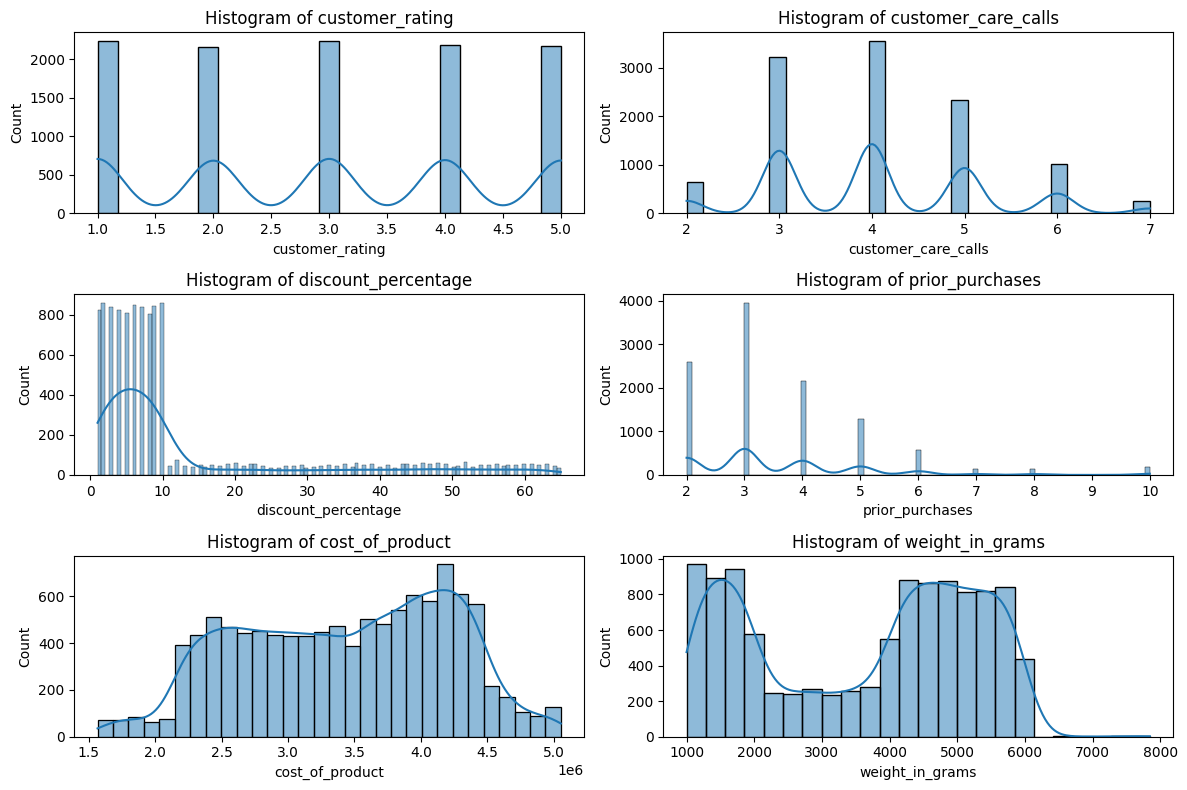

In [418]:
# resize the figure
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# flatten the axes array for easy iteration
axes = axes.flatten()

# loop through the dataframe columns and create histograms
for i, column in enumerate(num_data.columns):
    sns.histplot(num_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

# adjust layout
fig.tight_layout()

# show the plot
plt.show()

Observing the histogram, we note the following:
<br>
- Customer Rating exhibits a uniform distribution, suggesting that each possible rating within the range is equally likely to occur.
- Customer Care Calls displays a right skew, indicating a departure from a normal distribution. 
- Similarly, Discount Percentage and Prior Purchases also demonstrate right skewness, suggesting non-normal distributions.
- Moreover, Cost of Product appears to be right-skewed, further indicating a departure from normality.
- Lastly, Weight in Grams follows a bimodal distribution, indicating the presence of multiple distinct patterns or groups within the data.

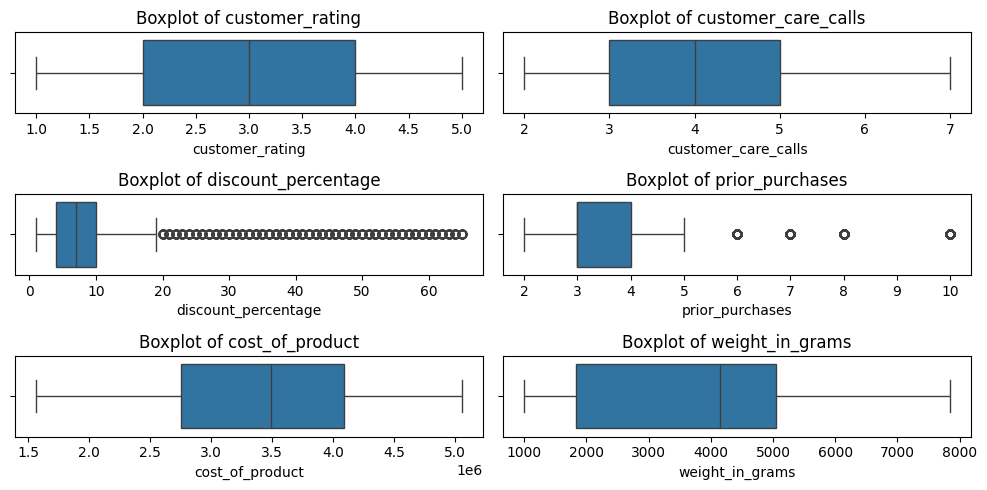

In [419]:
# resize the figure
fig, axes = plt.subplots(3, 2, figsize=(10, 5))

# flatten the axes array for easy iteration
axes = axes.flatten()

# loop through the dataframe columns and create boxplots
for i, column in enumerate(num_data.columns):
    sns.boxplot(x=num_data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# adjust layout
fig.tight_layout()

# show the plot
plt.show()

Upon inspection, it's evident that outliers are present, particularly in the Discount Percentage and Prior Purchases columns.
<br>
- Discount Percentage: Although the majority of discounts fall within the typical range of 2-10%, <br>there are notable instances of significantly larger values, resulting in a right-skewed distribution.

- Prior Purchases: While the majority of prior purchases cluster within the range of 3 to 4, <br>outliers are observed at values exceeding 5, contributing to a right-skewed distribution.


Now, we begin identifying the outlier by calculating the Q1, Q3, IQR, lower and upper bound to get the number of outliers

In [420]:
Q1 = num_data[['discount_percentage','prior_purchases']].quantile(0.25)
print('Q1 are:')
print(Q1)

Q1 are:
discount_percentage    4.0
prior_purchases        3.0
Name: 0.25, dtype: float64


In [421]:
Q3 = num_data[['discount_percentage','prior_purchases']].quantile(0.75)
print('Q3 are:')
print(Q3)

Q3 are:
discount_percentage    10.0
prior_purchases         4.0
Name: 0.75, dtype: float64


In [422]:
IQR = Q3 - Q1
print('The IQR are:')
print(IQR)

The IQR are:
discount_percentage    6.0
prior_purchases        1.0
dtype: float64


In [423]:
lower_bound = Q1 - 1.5 * IQR
print('The lower bound are:')
print(lower_bound)

The lower bound are:
discount_percentage   -5.0
prior_purchases        1.5
dtype: float64


In [424]:
upper_bound = Q3 + 1.5 * IQR
print('The upper bound are:')
print(upper_bound)

The upper bound are:
discount_percentage    19.0
prior_purchases         5.5
dtype: float64


Thus, we will get this as a result:

In [425]:
# to count the number of outliers
for columns in num_data.columns:
    q1 = num_data[[columns]].describe().loc['25%']
    q3 = num_data[[columns]].describe().loc['75%']
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = float(q3 + whis)
    lower_bound = float(q1 - whis)

    total_outliers = len(df[(num_data[columns] < lower_bound) | (num_data[columns] > upper_bound)])
    print(f'{columns} have {total_outliers} outliers.')

customer_rating have 0 outliers.
customer_care_calls have 0 outliers.
discount_percentage have 2209 outliers.
prior_purchases have 1003 outliers.
cost_of_product have 0 outliers.
weight_in_grams have 0 outliers.


In [426]:
# Top 5 entries with the highest discount
high_discount_df = df[df['discount_percentage'] > 19][["discount_percentage", "prior_purchases", "cost_of_product", "customer_rating"]].sort_values(by=['customer_rating'], ascending=False)
print("Top 5 transactions with the highest discount:")
high_discount_df.head(5)

Top 5 transactions with the highest discount:


,discount_percentage,prior_purchases,cost_of_product,customer_rating
11,32,3,3782760,5
1,59,2,3521880,5
24,28,2,4092555,5
3089,27,3,3570795,5
19,45,3,2364225,5


In [427]:
# Top 5 entries with the highest prior purchases
high_purchases_df = df[df['prior_purchases'] > 5.5][["discount_percentage", "prior_purchases", "cost_of_product", "customer_rating"]].sort_values(by=['customer_rating'], ascending=False)
print("Top 5 transactions with the highest prior purchases:")
high_purchases_df.head(5)

Top 5 transactions with the highest prior purchases:


,discount_percentage,prior_purchases,cost_of_product,customer_rating
10649,7,10,4255605,5
10719,6,6,3603405,5
10666,1,6,4271910,5
10466,10,6,4271910,5
274,22,6,3733845,5


There is **no need to drop the outliers** because the values appear logically explainable rather than anomalous.

For instance, values exceeding 19% in the Discount Percentage column (as observed from the graph) are considered outliers. <br>These higher discounts are common on particular dates such as company anniversaries. Furthermore, these discounts are <br>associated with high customer ratings, which are valuable for deeper analysis. Thus, categorizing the data as outliers is not necessary.

Similarly, in the Prior Purchases column, values above 5.5 (as observed from the graph) indicate customer repeat orders, <br>which are important in retention strategy to better understand their behavior.

**Dropping these outliers could result in the loss of critical insights into these high-impact areas.** <br>This consideration is particularly crucial as we plan to conduct an analysis in customer statisfaction later, <br>where understanding these high-value transaction will be essential.

### **3.4. Data Review**

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID                      10999 non-null  int64   
 1   warehouse_block         10999 non-null  object  
 2   mode_of_shipment        10999 non-null  object  
 3   customer_care_calls     10999 non-null  int64   
 4   customer_rating         10999 non-null  int64   
 5   cost_of_product         10999 non-null  int64   
 6   prior_purchases         10999 non-null  int64   
 7   product_importance      10999 non-null  object  
 8   gender                  10999 non-null  object  
 9   discount_percentage     10999 non-null  int64   
 10  weight_in_grams         10999 non-null  int64   
 11  reached_on_time         10999 non-null  object  
 12  customer_rating_string  10999 non-null  object  
 13  weight_in_kg_binned     10999 non-null  category
 14  prior_purchases_binned

In [429]:
df.head(5)

,ID,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_product,prior_purchases,product_importance,gender,discount_percentage,weight_in_grams,reached_on_time,customer_rating_string,weight_in_kg_binned,prior_purchases_binned,user_segmentation
0,1,D,Flight,4,2,2885985,3,low,F,44,1233,Yes,Dissatisfied,1-2.5kg,2-4,Bronze
1,2,E,Flight,4,5,3521880,2,low,M,59,3088,Yes,Satisfied,2.5-4kg,2-4,Bronze
2,3,A,Flight,2,2,2983815,4,low,M,48,3374,Yes,Dissatisfied,2.5-4kg,2-4,Bronze
3,4,B,Flight,3,3,2869680,4,medium,M,10,1177,Yes,Neutral,1-2.5kg,2-4,Bronze
4,5,C,Flight,2,2,3000120,3,medium,F,46,2484,Yes,Dissatisfied,1-2.5kg,2-4,Bronze


After that, we can export the clean dataset as a csv.

In [430]:
df.to_csv(r"data/Online_Retail_Shipping_Clean.csv", index=False)

***
## **4. Data Analysis**

#### **4.1. Numerical Attributes Analysis**

Let's examine the correlation between the following numerical variables to understand the strength of their relationships:

- Customer Care Calls
- Customer Rating
- Prior Purchases
- Discount Percentage
- Weight in Grams
- Cost of Product

In [431]:
num_data_columns = ['customer_care_calls', 'customer_rating',
    'prior_purchases', 'discount_percentage',
    'weight_in_grams', 'cost_of_product']
num_data = df[num_data_columns]
corr = num_data.corr()
corr

,customer_care_calls,customer_rating,prior_purchases,discount_percentage,weight_in_grams,cost_of_product
customer_care_calls,1.000000,0.012209,0.180771,-0.130750,-0.276615,0.323182
customer_rating,0.012209,1.000000,0.013179,-0.003124,-0.001897,0.009270
prior_purchases,0.180771,0.013179,1.000000,-0.082769,-0.168213,0.123676
discount_percentage,-0.130750,-0.003124,-0.082769,1.000000,-0.376067,-0.138312
weight_in_grams,-0.276615,-0.001897,-0.168213,-0.376067,1.000000,-0.132604
cost_of_product,0.323182,0.009270,0.123676,-0.138312,-0.132604,1.000000


Now, let's visualize it using a heatmap.

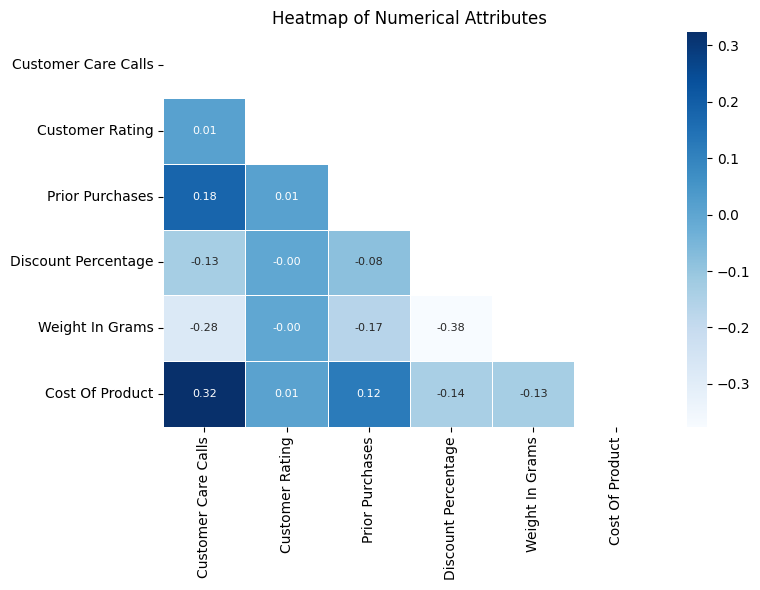

In [432]:
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))

labels = [col.replace("_", " ").title() for col in num_data_columns]
sns.heatmap(
    corr, 
    annot=True,
    annot_kws={'size': 8},
    xticklabels=labels,
    yticklabels=labels,
    mask=mask,
    fmt='.2f', 
    linewidths=.5,
    cbar=True,
    cmap='Blues'
)
plt.title('Heatmap of Numerical Attributes')
plt.tight_layout()
plt.show()


From the correlation metric above, overall, most of the attributes examined through correlation are relatively low. However, we can draw the following interpretations:
1. Cost of Product vs Customer Care Calls: As the cost of the product increases, <br>there is a tendency for the number of customer care calls to increase as well, but this relationship is not strong or definitive.
2. Weight in Grams vs Discount Percentage: As the weight in grams increases, <br>there is a tendency for the discount percentage to decrease, but the relationship is not very strong.

Interestingly, the correlation between customer rating and variables like cost of product, discount percentage, and customer care calls is almost zero. 
<br>This means there's little to no linear relationship between them. Customers might rate products without being influenced by these factors, <br>or there could be other important factors we haven't measured yet. We'll explore this further later.

#### **4.2. Categorical Attributes Analysis**

To gain a clearer understanding of the frequency distribution of categorical variables, we will visualize the categorical attributes in count plots. <br>Additionally, we have included percentages per category to help us grasp the proportion of the data.

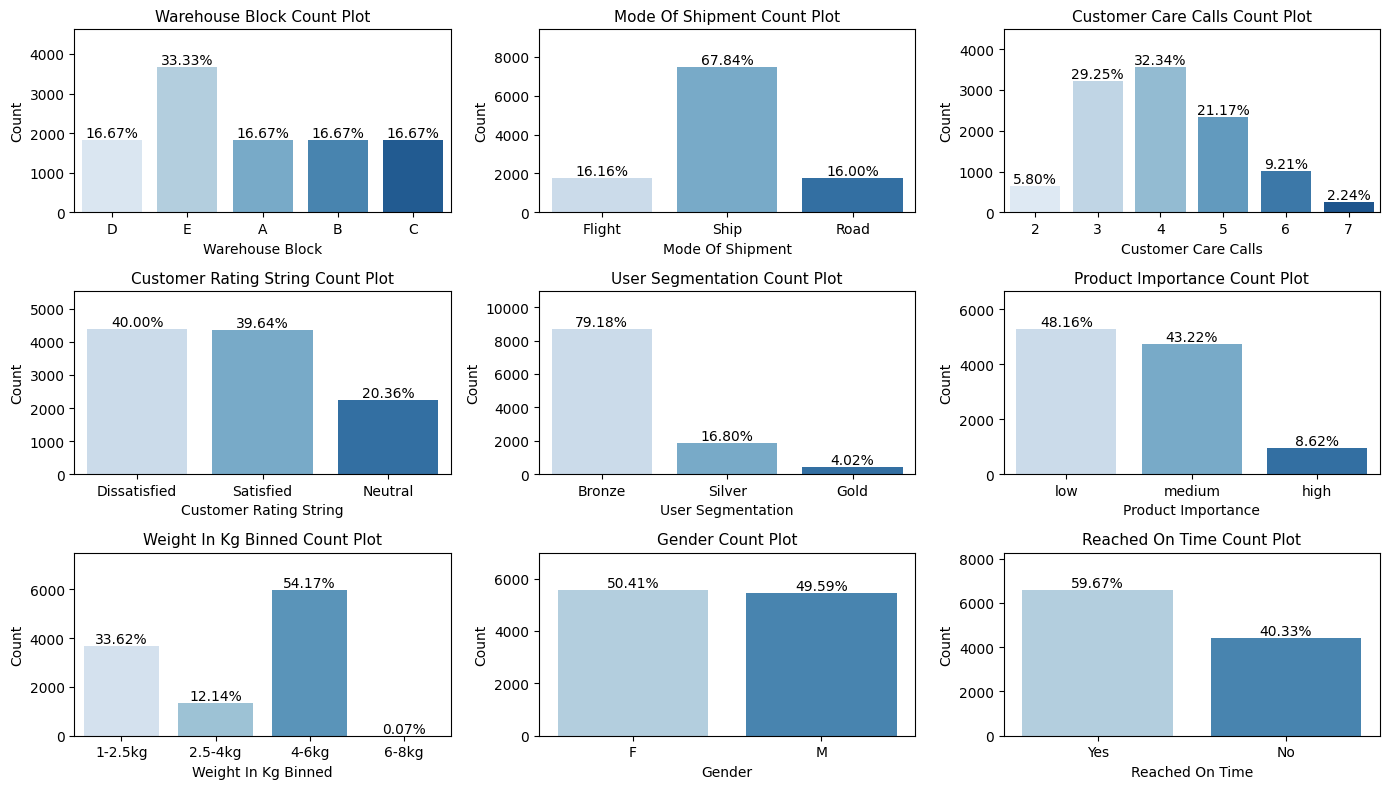

In [433]:
cat_data_columns = ['warehouse_block', 'mode_of_shipment', 'customer_care_calls', 
    'customer_rating_string', 'user_segmentation', 'product_importance', 
    'weight_in_kg_binned', 'gender', 'reached_on_time']

plt.figure(figsize=(14, 8))
plotnumber = 1

labels = [col.replace("_", " ").title() for col in cat_data_columns]

for i in range(len(labels)):
    ax = plt.subplot(3, 3, plotnumber)
    sns.countplot(
        x=cat_data_columns[i],
        data=df,
        ax=ax,
        palette='Blues')
    ax.set_title(f"{labels[i]} Count Plot", fontsize=11)
    ax.set_xlabel(labels[i])
    ax.set_ylabel('Count')

    # Adding proportion labels
    total = float(len(df[cat_data_columns[i]]))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.5,
                '{:.2f}%'.format((height/total)*100),
                ha="center", va="bottom")
    ax.legend([],[], frameon=False)

    ax.set_ylim(0, ax.get_ylim()[1] * 1.2)
    plotnumber += 1

plt.tight_layout()
plt.show()


From the preceding graphs, here's what we can gather:

1. **Warehouse Block**: One-third of transactions are fulfilled through Warehouse E, indicating high demand or its capacity for accommodating more shipments.
2. **Mode of Shipment**: Ship transport is favored, accounting for about 67% of all modes.
3. **Customer Care Calls**: Around 82% of transactions involve customer calls, with most ranging from 3 to 5 times, suggesting a significant need for support. <br>Multiple calls may indicate difficulties in completing transactions or experiencing delays.
4. **Customer Rating**: Approximately 80% of customers express either satisfaction or dissatisfaction. <br>Understanding reasons behind both is crucial for improving products or services, leading to increased loyalty and business performance.
5. **User Segmentation**: Roughly 80% of Bronze-category customers have made purchases 2-4 times.
6. **Product Importance**: About 90% of shipped products fall within the Low and Medium Importance categories.
7. **Weight in KG Binned**: Approximately 30% of items weigh between 1-2.5kg, while about 50% weigh between 4-6kg.
8. **Gender**: Orders are relatively evenly split between men and women.
9. **Reached On Time**: Unfortunately, only around 60% of items arrived on time. This figure needs improvement to gain customer trust and remain competitive.

#### **4.3. Key Metric: Customer Ratings and Discount Percentage Analysis**

##### **4.3.1. Customer Ratings Overview**

Let's examine whether Customer Rating is influenced by attributes such as Discount Percentage, Prior Purchases, and Cost of Product.

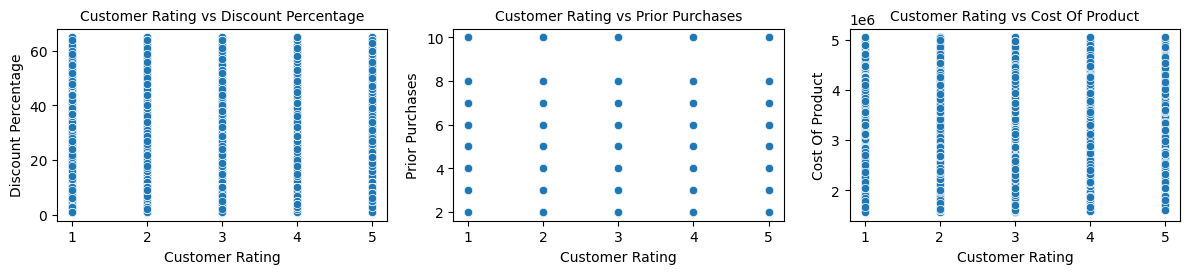

In [434]:
rating_data_columns = ["customer_rating", "discount_percentage", "prior_purchases", "cost_of_product"]

fig, axes = plt.subplots(1, len(rating_data_columns) - 1, figsize=(12, 3))

labels = [col.replace("_", " ").title() for col in rating_data_columns[1:]]

for i, attr in enumerate(rating_data_columns[1:]):
    sns.scatterplot(x=df["customer_rating"], y=df[attr], ax=axes[i])
    axes[i].set_xlabel("Customer Rating")
    axes[i].set_ylabel(labels[i])
    axes[i].set_title(f"Customer Rating vs {labels[i]}", fontsize=10)

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.show()

Here, we observe that Customer Rating does not seem to be influenced by Discount Offered. Similarly, Prior Purchases and the Cost of the Product <br>also show no correlation with Customer Rating. This suggests that customers may not be particularly sensitive to these factors when making purchasing decisions. <br>So based of data we cannot propose recomendation assuming adding significant raise in discount or reduce product price will result indiference.

##### **4.3.2. Discount Percentage Overview**

Let's examine whether there's a pattern in how discounts are given as a percentage.

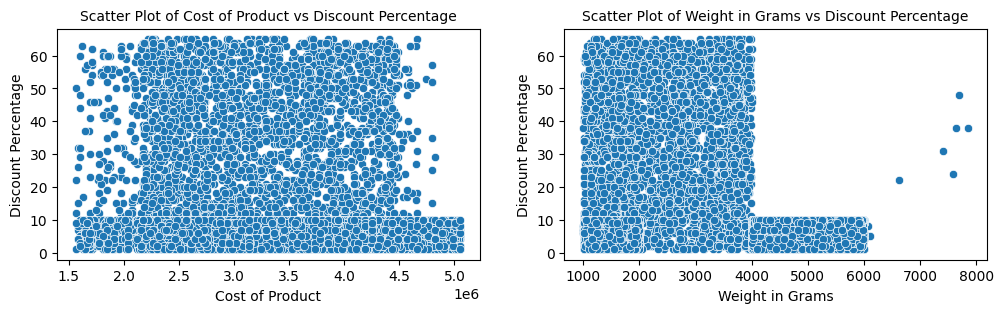

In [435]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.scatterplot(x=df['cost_of_product'], y=df['discount_percentage'], ax=axes[0])
axes[0].set_xlabel('Cost of Product')
axes[0].set_ylabel('Discount Percentage')
axes[0].set_title('Scatter Plot of Cost of Product vs Discount Percentage', fontsize=10)

sns.scatterplot(x=df['weight_in_grams'], y=df['discount_percentage'], ax=axes[1])
axes[1].set_xlabel('Weight in Grams')
axes[1].set_ylabel('Discount Percentage')
axes[1].set_title('Scatter Plot of Weight in Grams vs Discount Percentage', fontsize=10)

plt.subplots_adjust(wspace=0.2)
plt.show()


From the scatter plots above, we can conclude the following: 
1. Regardless of the product's price range, discounts of up to 10% are frequently offered, indicating a consistent pricing strategy across different product categories.
2. Products weighing less than 4kg are more likely to have discounts applied, suggesting that weight plays a role in determining the discount percentage.

#### **4.4. Key Metric: Delivery Timeliness and Warehouse Block Analysis**

##### **4.4.1. Delivery Timeliness by Warehouse Block Overview**

Let's examine whether items arrived on time across warehouse blocks through some aggregation and visualization as follows:

In [436]:
result_counts = df.groupby(['warehouse_block', 'reached_on_time']).size()
total_counts = df.groupby('warehouse_block').size()
percentage = round(result_counts / total_counts * 100, 2)

pd.DataFrame({'count': result_counts, 'percentage': percentage})

count  percentage
warehouse_block reached_on_time                   
A               No                 758       41.35
                Yes               1075       58.65
B               No                 729       39.77
                Yes               1104       60.23
C               No                 739       40.32
                Yes               1094       59.68
D               No                 738       40.24
                Yes               1096       59.76
E               No                1472       40.15
                Yes               2194       59.85

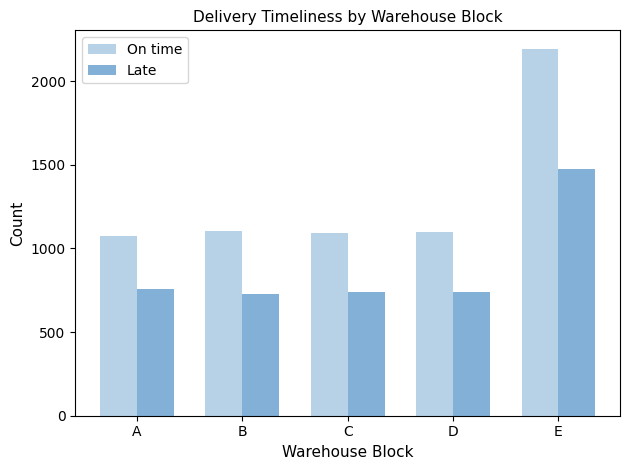

In [437]:
on_time = df[df['reached_on_time'] == 'Yes'].groupby('warehouse_block').size()
late = df[df['reached_on_time'] == 'No'].groupby('warehouse_block').size()

df_tmp = pd.DataFrame({'On time': on_time, 'Late': late})

bar_width = 0.35
index = np.arange(len(df_tmp.index))

plt.bar(index - bar_width/2, df_tmp['On time'], bar_width, color='#99bede', label='On time', alpha=0.7)
plt.bar(index + bar_width/2, df_tmp['Late'], bar_width, color='#4f8fc6', label='Late', alpha=0.7)
plt.xlabel('Warehouse Block', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Delivery Timeliness by Warehouse Block', fontsize=11)
plt.legend()
plt.xticks(index, df_tmp.index)
plt.tight_layout()
plt.show()

There are some things that can be inferred from the results:
1. The overall proportion of items delivered on time and late is approximately 60% and 40%, respectively.
2. Warehouse E can accommodate twice as much as the other warehouses. This suggests that Warehouse E is located in a highly demanded area or acts as a hub for the other warehouses.

##### **4.4.2. Product Importance by Warehouse Block Overview**

Next, let's explore how items are distributed across warehouse blocks based on their importance level by employing aggregation and visualization techniques.

In [438]:
result_counts = df.groupby(['warehouse_block', 'product_importance']).size()
total_counts = df.groupby('warehouse_block').size()
percentage = round(result_counts / total_counts * 100, 2)

pd.DataFrame({'count': result_counts, 'percentage': percentage})

count  percentage
warehouse_block product_importance                   
A               high                  165        9.00
                low                   909       49.59
                medium                759       41.41
B               high                  146        7.97
                low                   855       46.64
                medium                832       45.39
C               high                  168        9.17
                low                   874       47.68
                medium                791       43.15
D               high                  166        9.05
                low                   883       48.15
                medium                785       42.80
E               high                  303        8.27
                low                  1776       48.45
                medium               1587       43.29

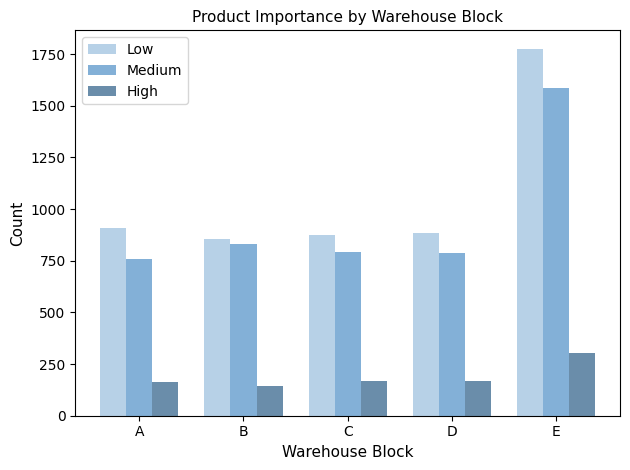

In [439]:
low = df[df['product_importance'] == 'low'].groupby('warehouse_block').size()
medium = df[df['product_importance'] == 'medium'].groupby('warehouse_block').size()
high = df[df['product_importance'] == 'high'].groupby('warehouse_block').size()

df_tmp = pd.DataFrame(data={'Low': low, 'Medium': medium, 'High': high})

bar_width = 0.25
index = np.arange(len(df_tmp.index))

plt.bar(index - bar_width, df_tmp['Low'], bar_width, color='#99bede', label='Low', alpha=0.7)
plt.bar(index, df_tmp['Medium'], bar_width, color='#4f8fc6', label='Medium', alpha=0.7)
plt.bar(index + bar_width, df_tmp['High'], bar_width, color='#2b5d87', label='High', alpha=0.7)
plt.xlabel('Warehouse Block', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Product Importance by Warehouse Block', fontsize=11)
plt.legend()
plt.xticks(index, df_tmp.index)
plt.tight_layout()
plt.show()


There are several key takeaways from the results:
1. Warehouse E notably outstrips other warehouses in capacity, accommodating roughly twice the number of items across all importance levels.
2. Medium importance items dominate across all warehouses, comprising between 41.41% and 48.45% of total items, indicating a consistent inventory distribution pattern.
3. High importance items range from 7.97% to 9.17% of the total items per warehouse block.

##### **4.4.3. Mode of Shipment by Warehouse Block Overview**

Lets investigate the distribution of items among warehouse blocks according to their transportation method using aggregation and visualization methods.

In [440]:
result_counts = df.groupby(['warehouse_block', 'mode_of_shipment']).size()
total_counts = df.groupby('warehouse_block').size()
percentage = round(result_counts / total_counts * 100, 2)

pd.DataFrame({'count': result_counts, 'percentage': percentage})

count  percentage
warehouse_block mode_of_shipment                   
A               Flight              297       16.20
                Road                294       16.04
                Ship               1242       67.76
B               Flight              296       16.15
                Road                294       16.04
                Ship               1243       67.81
C               Flight              295       16.09
                Road                294       16.04
                Ship               1244       67.87
D               Flight              297       16.19
                Road                292       15.92
                Ship               1245       67.88
E               Flight              592       16.15
                Road                586       15.98
                Ship               2488       67.87

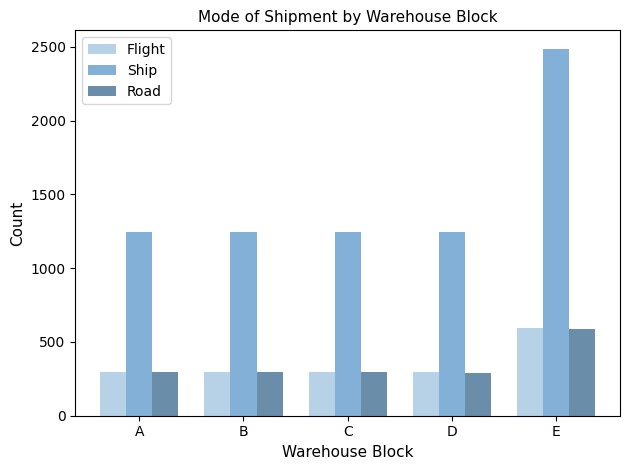

In [441]:
flight = df[df['mode_of_shipment'] == 'Flight'].groupby('warehouse_block').size()
ship = df[df['mode_of_shipment'] == 'Ship'].groupby('warehouse_block').size()
road = df[df['mode_of_shipment'] == 'Road'].groupby('warehouse_block').size()

df_tmp = pd.DataFrame(data={'Flight': flight, 'Ship': ship, 'Road': road})

bar_width = 0.25
index = np.arange(len(df_tmp.index))

plt.bar(index - bar_width, df_tmp['Flight'], bar_width, color='#99bede', label='Flight', alpha=0.7)
plt.bar(index, df_tmp['Ship'], bar_width, color='#4f8fc6', label='Ship', alpha=0.7)
plt.bar(index + bar_width, df_tmp['Road'], bar_width, color='#2b5d87', label='Road', alpha=0.7)
plt.xlabel('Warehouse Block', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Mode of Shipment by Warehouse Block', fontsize=11)
plt.legend()
plt.xticks(index, df_tmp.index)
plt.tight_layout()
plt.show()


Here are the key takeaways from the provided data on the distribution of items across warehouse blocks based on their mode of shipment:

1. Consistent Mode of Shipment: Across all warehouse blocks (A, B, C, D, E), the majority of items are transported via ships, accounting for approximately 67.76% to 67.88% of total shipments. This indicates a consistent preference for sea transportation across different locations.

2. Balanced Distribution: The distribution of items transported by flights and roads is relatively balanced across warehouse blocks, with percentages ranging from 15.92% to 16.20% for flights and 15.98% to 16.04% for roads. This suggests a diversified transportation strategy, utilizing both air and land routes, to meet logistical needs efficiently.

***
### **5. Final Thoughts**

#### **5.1. Conclusion**

Our analysis of the Online Retail Shipping has revealed several key insights and trends:


1. **Customer Rating vs. Discounts and Product Costs:**

    - **Influence of Discounts and Product Costs**: Customer ratings show little correlation with discounts offered and product costs. This suggests that traditional pricing strategies may not significantly impact customer satisfaction or loyalty.

    - **Resource Allocation Considerations**: Investing in discounts or price reductions without a clear impact on customer satisfaction may lead to resource misallocation, potentially affecting overall business performance.

2. **Discount Trends in Product Pricing:**

    - **Consistent Discounting Strategy**: Across different product categories, discounts of up to 10% are frequently offered, regardless of price range. This consistent approach raises questions about the effectiveness of discounts in influencing customer purchasing behavior.

    - **Weight-based Discounting**: Products weighing less than 4kg are more likely to have discounts applied. This suggests a segmentation strategy based on product attributes, potentially impacting pricing perceptions among customers.<br><br>

3. **Operational Efficiency and Warehouse Management:**

    - **Timeliness and Customer Satisfaction**: Approximately 60% of deliveries are on time, highlighting areas for improvement in logistics and supply chain management. Late deliveries can negatively impact customer satisfaction and brand reputation.
    
    - **Strategic Warehouse Utilization**: Warehouse E's ability to accommodate twice as much as others suggests its strategic importance. Leveraging its capacity effectively can enhance supply chain performance and reduce costs.

#### **5.2. Recommendation**

Based on our analysis insights, here are our recommendations for action:

1. **Enhancing Customer Experience Beyond Discounts and Product Costs**:
<br>Instead of solely relying on discounts or price reductions, businesses should prioritize improving other facets of the customer journey. This includes enhancing product quality, streamlining delivery processes, offering exceptional customer service, and personalizing marketing efforts. By focusing on these aspects, businesses can create a more compelling value proposition, fostering stronger customer relationships and ensuring sustainable growth and loyalty.

2. **Aligning Pricing Strategies with Customer Preferences**:
<br>Businesses should reassess their pricing and discounting approaches to better match customer preferences and market dynamics. Recommended actions include:

    - Conducting thorough market research to understand customer preferences regarding pricing and discounts.
    
    - Implementing targeted and personalized discounting strategies based on customer segments and product categories.
    
    - Continuously monitoring and analyzing the impact of discounts on sales performance, customer satisfaction, and overall profitability.
    
    - Iterating and refining pricing strategies based on customer feedback and market insights to remain competitive and drive sustainable growth.
    
3. **Improving Operational Efficiency and Warehouse Management**:
<br>Businesses should prioritize initiatives aimed at enhancing operational efficiency, optimizing warehouse management, and enhancing overall customer satisfaction. Recommended actions include:

    - Enhancing the fulfillment process by investing in operational excellence strategies such as optimizing route planning, refining inventory management systems, and implementing automation and real-time tracking technologies. These initiatives aim to streamline operations, reduce lead times, and enhance overall efficiency in order fulfillment.
    
    - Strategically evaluating the importance of each warehouse within the distribution network and optimizing warehouse operations accordingly. This may involve reallocating resources, expanding capacity in high-demand areas, and optimizing inventory distribution to meet customer needs effectively.
    
Addressing these key areas will not only mitigate the impact of late deliveries but also position businesses to gain a competitive advantage in the market and cultivate long-term customer loyalty.

***
## **6. Cost Efficiency Proposition**


### **6.1. Minimizing Shipping Expenses**


Given the limited availability of detailed data, we are proposing a cost-efficiency analysis based on product importance, mode of shipment, and weight in grams. This analysis is contextualized as follows:

In [442]:
details = {
    'mode_of_shipment': ['Flight', 'Ship', 'Road'],
    'cost_per_kg': [36190, 4500, 31000],
    'delivery_time_days': [2, 10, 5]
}
details_df = pd.DataFrame(details)

The constants mentioned above are derived from benchmarking local shipping services departing from Jakarta to Batam, as detailed below:

1. Flight: Provided by Lion Parcel (Boss Pack) at IDR 36,190, with an estimated delivery time of 1-2 days.
2. Road: Offered by JNT (EZ package) at IDR 31,000, with an estimated delivery time of 3-7 days.
3. Ship: Provided by PELNI at IDR 4,500, with an estimated delivery time of 8-10 days.

Let's calculate the hypothetical expenses based on the constants provided above.

In [443]:
tmp_df = df.copy()

tmp_df['weight_in_kg'] = tmp_df['weight_in_grams'] / 1000
tmp_df = tmp_df.merge(details_df, on='mode_of_shipment')
tmp_df['shipping_cost'] = tmp_df['weight_in_kg'] * tmp_df['cost_per_kg']

cost_summary = tmp_df.groupby(['mode_of_shipment', 'product_importance'])['shipping_cost'].sum().unstack().fillna(0)
display(cost_summary)
formatted_total_cost = '{:,.0f}'.format(round(tmp_df['shipping_cost'].sum()))
print(f"Total cost: IDR {formatted_total_cost}")

product_importance,high,low,medium
mode_of_shipment,,,
Flight,24008047.91,1.072377e+08,102158217.7
Road,19467039.00,9.294126e+07,86711185.0
Ship,11276572.50,5.654209e+07,54122053.5


Total cost: IDR 554,464,158


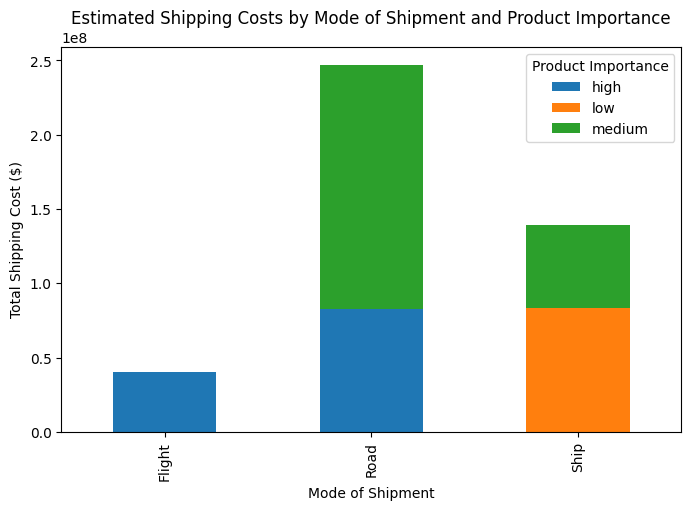

In [451]:
cost_summary.plot(kind='bar', stacked=True, figsize=(8, 5))

plt.xlabel('Mode of Shipment')
plt.ylabel('Total Shipping Cost ($)')
plt.title('Estimated Shipping Costs by Mode of Shipment and Product Importance')
plt.legend(title='Product Importance')
plt.show()


Now, by disregarding other factors and focusing solely on remapping the mode of shipping based on product importance, with the following details:

1. Remap 30% of highly important products to Flight and 30% to Road.
2. Remap 30% of medium important products to Road and 30% to Ship.
3. Remap 100% of low importance products to Ship.
Let's see if expenses can be minimized.

In [447]:
tmp_df = df.copy()

tmp_df.loc[tmp_df['product_importance'] == 'high', 'mode_of_shipment'] = 'Flight'
tmp_df.loc[tmp_df['product_importance'] == 'low', 'mode_of_shipment'] = 'Ship'
tmp_df.loc[tmp_df['product_importance'] == 'medium', 'mode_of_shipment'] = 'Road'

high_importance = tmp_df[tmp_df['product_importance'] == 'high']
portion_of_high_importance = high_importance.sample(frac=0.7, random_state=1)

tmp_df.loc[portion_of_high_importance.index, 'mode_of_shipment'] = 'Road'

medium_importance = tmp_df[tmp_df['product_importance'] == 'medium']
portion_of_medium_importance = medium_importance.sample(frac=0.7, random_state=1)

tmp_df.loc[portion_of_medium_importance.index, 'mode_of_shipment'] = 'Ship'

tmp_df['weight_in_kg'] = tmp_df['weight_in_grams'] / 1000
tmp_df = tmp_df.merge(details_df, on='mode_of_shipment')
tmp_df['shipping_cost'] = tmp_df['weight_in_kg'] * tmp_df['cost_per_kg']

cost_summary = tmp_df.groupby(['mode_of_shipment', 'product_importance'])['shipping_cost'].sum().unstack().fillna(0)
display(cost_summary)

formatted_total_cost = '{:,.0f}'.format(round(tmp_df['shipping_cost'].sum()))
print(f"Total cost: IDR {formatted_total_cost}")


product_importance,high,low,medium
mode_of_shipment,,,
Flight,40610463.74,0.0,0.0
Road,82928627.00,0.0,163910175.0
Ship,0.00,83367895.5,55618483.5


Total cost: IDR 426,435,645


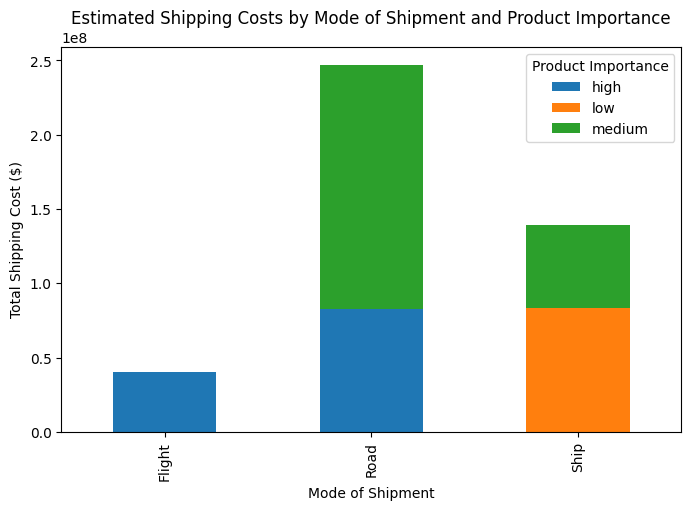

In [450]:
cost_summary.plot(kind='bar', stacked=True, figsize=(8, 5))

plt.xlabel('Mode of Shipment')
plt.ylabel('Total Shipping Cost ($)')
plt.title('Estimated Shipping Costs by Mode of Shipment and Product Importance')
plt.legend(title='Product Importance')
plt.show()

In [449]:
original_value = 554464158
new_value = 426435645

percentage_reduction = ((original_value - new_value) / original_value) * 100

print("Percentage Reduction:", percentage_reduction, "%")


Percentage Reduction: 23.090493975626824 %


After implementing the proposed changes, there has been a notable reduction of approximately 23.09% in the relevant metric.

What's Next: Strategies to Optimize Shipping Costs and Improve Customer Satisfaction
1. **Negotiating Shipping Rates**:
Shipping rates could be negotiated with shipping partners to potentially benefit from lower costs, particularly for businesses with high shipping volumes. Utilizing shipping data and considering future business growth may result in securing more favorable rates. This could potentially mitigate any increased costs due to changes in shipping patterns based on product importance.

2. **Adjusting Prices to Offer Free Shipping**:
Analyzing average shipping costs incurred for various shipping methods and product importance levels could yield valuable insights. If feasible, some of these costs could be absorbed to offer free shipping, especially for products of high importance shipped via more expensive methods such as air shipping. This strategy may enhance customer satisfaction and competitiveness while potentially offsetting the impact of increased shipping expenses.